<a href="https://colab.research.google.com/github/Rajasri8102/Rajasri-FITA-Capstone-Project-1/blob/main/FITA_Capstone_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Capstone Project 2 (Employee Analytics Project)
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
csv_file_path = "/content/drive/MyDrive/Colab Notebooks/Capstone Project2 Employee Dataset.csv"
df = pd.read_csv(csv_file_path)
df.info()
df.head()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   emp_id        50 non-null     int64  
 1   name          50 non-null     object 
 2   age           49 non-null     float64
 3   city          50 non-null     object 
 4   department    49 non-null     object 
 5   salary        49 non-null     float64
 6   joining_date  50 non-null     object 
 7   experience    50 non-null     int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.3+ KB


,emp_id,age,salary,experience
count,50.00000,49.000000,49.000000,50.000000
mean,125.50000,31.387755,55653.061224,4.940000
std,14.57738,5.090090,15534.304807,2.838583
min,101.00000,22.000000,30000.000000,1.000000
25%,113.25000,27.000000,43000.000000,3.000000
50%,125.50000,30.000000,56000.000000,5.000000
75%,137.75000,35.000000,68000.000000,6.750000
max,150.00000,42.000000,85000.000000,12.000000


In [ ]:
#📘 2. Data Cleaning
print("📘 2. Data Cleaning")
df["joining_date"] = pd.to_datetime(df["joining_date"])
print(df["joining_date"])
df["name"] = df["name"].str.strip().str.title()
print(df["name"])
df["city"] = df["city"].str.strip().str.title()
print(df["city"])
print(df.isnull().sum())
print(df.duplicated().sum())
df["age"] = df["age"].fillna(df["age"].median())
df["salary"] = df["salary"].fillna(df["salary"].mean())
df["department"] = df["department"].fillna(df["department"].mode()[0])
df = df.drop(df[df["department"] == "unknown"].index)
df["department"]

📘 2. Data Cleaning
0    2020-06-01
1    2019-08-01
2    2018-01-15
3    2016-03-01
4    2022-02-01
5    2017-07-01
6    2021-03-15
7    2020-11-01
8    2021-09-01
9    2015-05-01
10   2019-04-01
11   2018-06-01
12   2022-01-01
13   2014-02-01
14   2019-12-01
15   2020-08-01
16   2017-03-01
17   2021-07-01
18   2018-09-01
19   2015-01-01
20   2018-05-01
21   2016-09-01
22   2021-02-01
23   2017-11-01
24   2019-06-01
25   2020-01-01
26   2014-07-01
27   2021-05-01
28   2018-03-01
29   2015-10-01
30   2018-12-01
31   2022-04-01
32   2013-08-01
33   2017-01-01
34   2020-09-01
35   2016-06-01
36   2021-07-01
37   2020-10-01
38   2015-02-01
39   2018-08-01
40   2021-11-01
41   2017-05-01
42   2015-03-01
43   2022-06-01
44   2014-04-01
45   2019-07-01
46   2018-02-01
47   2016-12-01
48   2022-03-01
49   2017-09-01
Name: joining_date, dtype: datetime64[ns]
0          Mano
1          Ajay
2         Kumar
3          Ravi
4          Arun
5         Divya
6         Sneha
7         Vijay
8         M

,department
0,IT
1,HR
2,Finance
3,IT
4,Sales
5,Finance
6,IT
7,Sales
8,HR
9,Finance


In [ ]:
#📘 2. KPI Computation
print("📘 2. KPI Computation")
#✔ Average salary
df["salary"].mean()
print("Average Salary:", df["salary"].mean())
#✔ Avg salary per department
df.groupby("department")["salary"].mean()
print("Average Salary per Department:" ,df.groupby("department")["salary"].mean())
#✔ Employee count per city
df["city"].value_counts()
print("Employee Count per City:" ,df["city"].value_counts())
#✔ Highest salary employee
df.loc[df["salary"].idxmax()]
print("Highest Salary Employee:" ,df.loc[df["salary"].idxmax()])
#✔ Employees with > 8 years experience
print("Employees with > 8 years experience:" ,df[df["experience"] > 8])

📘 2. KPI Computation
Average Salary: 55653.0612244898
Average Salary per Department: department
Finance    68666.666667
HR         46200.000000
IT         59475.218659
Sales      41600.000000
Unknown    42000.000000
Name: salary, dtype: float64
Employee Count per City: city
Chennai      12
Bangalore    10
Mumbai       10
Delhi         9
Hyderabad     9
Name: count, dtype: int64
Highest Salary Employee: emp_id                          133
name                           Arul
age                            41.0
city                      Hyderabad
department                  Finance
salary                      85000.0
joining_date    2013-08-01 00:00:00
experience                       12
Name: 32, dtype: object
Employees with > 8 years experience:     emp_id     name   age       city department   salary joining_date  \
13     114  Karthik  40.0    Chennai         IT  82000.0   2014-02-01   
19     120  Santosh  42.0     Mumbai         HR  68000.0   2015-01-01   
26     127    Gokul  39.0 

In [ ]:
#📘 3. Employee Segmentation Using cut() #Feature Engineering
df["salary_band"] = pd.cut(df["salary"],
                           bins=[0,40000,60000,100000],
                           labels=["Low","Medium","High"])
df.head()

,emp_id,name,age,city,department,salary,joining_date,experience,salary_band
0,101,Mano,27.0,Chennai,IT,45000.0,2020-06-01,3,Medium
1,102,Ajay,32.0,Bangalore,HR,52000.0,2019-08-01,4,Medium
2,103,Kumar,29.0,Chennai,Finance,60000.0,2018-01-15,5,Medium
3,104,Ravi,41.0,Mumbai,IT,70000.0,2016-03-01,7,High
4,105,Arun,22.0,Chennai,Sales,30000.0,2022-02-01,1,Low


/tmp/ipython-input-1795227801.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="city", palette="viridis", ax=axes[1])
/tmp/ipython-input-1795227801.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="department", y="salary", palette="viridis", ax=axes[2])
/tmp/ipython-input-1795227801.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="department", palette="viridis", ax=axes[4])


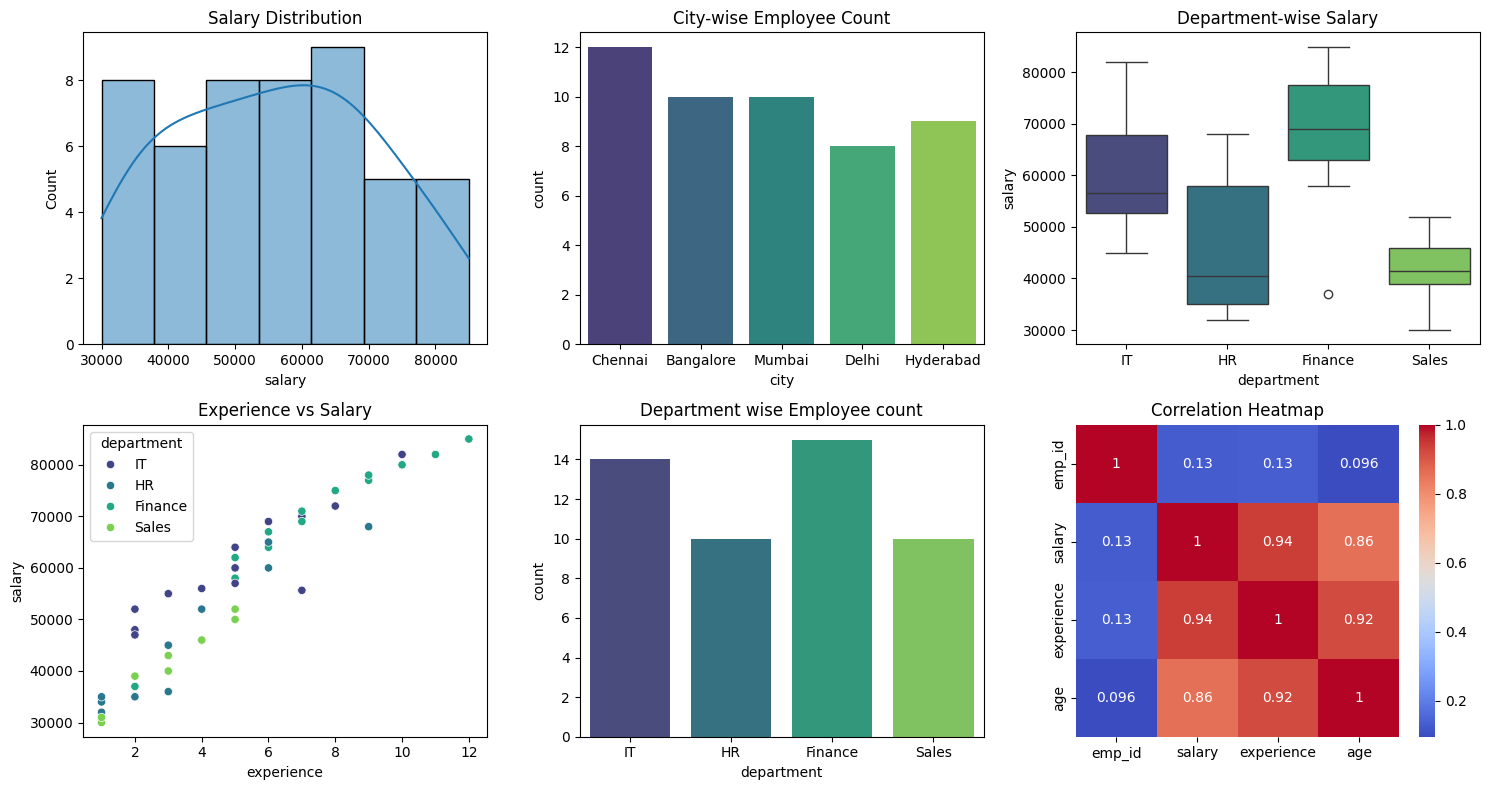

In [ ]:
#📘 4. Visualizations
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()
#✔ Salary distribution — Histogram
sns.histplot(df["salary"], kde=True, ax=axes[0])
axes[0].set_title("Salary Distribution")
#✔ City-wise employee count — Bar chart
sns.countplot(data=df, x="city", palette="viridis", ax=axes[1])
axes[1].set_title("City-wise Employee Count")
#✔ Department-wise salary — Boxplot
sns.boxplot(data=df, x="department", y="salary", palette="viridis", ax=axes[2])
axes[2].set_title("Department-wise Salary")
#✔ Experience vs Salary — Scatterplot
sns.scatterplot(data=df, x="experience", y="salary", hue="department", palette="viridis", ax=axes[3])
axes[3].set_title("Experience vs Salary")
#✔ Department wise Employee count — Bar Chart
sns.countplot(data=df, x="department", palette="viridis", ax=axes[4])
axes[4].set_title("Department wise Employee count")
#✔ Correlation heatmap
corr = df[["emp_id","salary","experience","age"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [ ]:
📘 5. Insights Writing
Chennai has the highest employee count
Finance department has the maximum average salary
Finance department Employees has the High experience
Finance department the highest employee count
Salary positively correlates with experience








